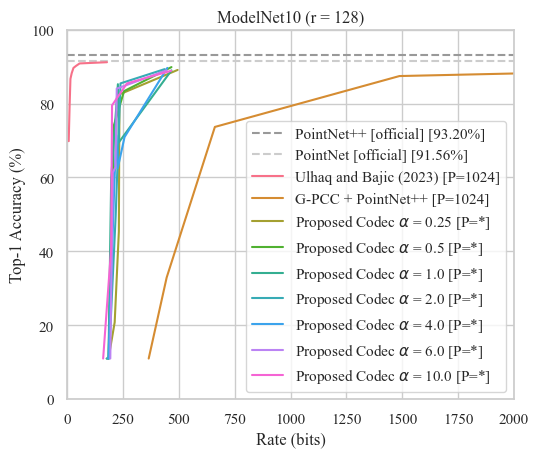

./output/Scalable/JPG/PCC_for_classification_128.jpg
./output/Scalable/PDF/PCC_for_classification_128.pdf


In [16]:
import sys
import os
import re

import bjontegaard as bd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from compressai_trainer.utils.compressai.results import compressai_results_dataframe

sys.path.append('/media/avitech7/QuocAnh_1TB/Point_Cloud/source_code/compression_frameworks/learned-point-cloud-compression-for-classification')

sns.set_theme(
    # context="paper",
    style="whitegrid",
    font="Times New Roman",
    # font_scale=1,
)

EPSILON = 1e-8

DATASET = "ModelNet10"
x = "bits"
y = "acc_top1"

resolution = 128
REF_CODEC_NAME = "Input compression codec [tmc13, P=*]"
CODECS = [
    f"MMSP2023_methods_res{resolution}.json",
    f"GPCC_PointNetPP_res{resolution}.json",
    f"Proposed_Cocdec_r1_res{resolution}.json",
    f"Proposed_Cocdec_r2_res{resolution}.json",
    f"Proposed_Cocdec_r3_res{resolution}.json",
    f"Proposed_Cocdec_r4_res{resolution}.json",
    f"Proposed_Cocdec_r5_res{resolution}.json",
    f"Proposed_Cocdec_r6_res{resolution}.json",
    f"Proposed_Cocdec_r7_res{resolution}.json",
]

COLORS = {
    "baseline_with_transform": "#CCCCCC",
    "baseline_no_transform": "#999999",
}

POINTNET_RESULTS = {
    '64': 0.927632 * 100,
    '128': 0.91557 * 100,
    '256': 0.926535 * 100
}
POINTNETPP_RESULTS = {
    '64': 0.934211 * 100,
    '128': 0.932018 * 100,
    '256': 0.930921 * 100
}

def plot_baseline(ax, resolution):
    _, x_max = ax.get_xlim()
    ax.plot(
        [0, x_max],
        [POINTNETPP_RESULTS[str(resolution)], POINTNETPP_RESULTS[str(resolution)]],
        label=f"PointNet++ [official] [{POINTNETPP_RESULTS[str(resolution)]:.{2}f}%]",
        color=COLORS["baseline_no_transform"],
        linestyle="--",
    )
    ax.plot(
        [0, x_max],
        [POINTNET_RESULTS[str(resolution)], POINTNET_RESULTS[str(resolution)]],
        label=f"PointNet [official] [{POINTNET_RESULTS[str(resolution)]:.{2}f}%]",
        color=COLORS["baseline_with_transform"],
        linestyle="--",
    )
    

def read_dataframe():
    df = pd.concat(
        [
            compressai_results_dataframe(
                filename=name,
                base_path="./",
            )
            for name in CODECS
        ]
    )

    def name_to_codec_type(name):
        name_pattern = r"^Proposed codec \[(?P<codec_type>[\w-]+), P=(?P<points>\d+)\]$"
        m = re.match(name_pattern, name)
        if m:
            return m.group("codec_type")
        return "input-compression"

    df["codec_type"] = df["name"].apply(name_to_codec_type)

    return df

df = read_dataframe()
# print(df.to_string())


fig, ax = plt.subplots(figsize=(0.9 * 6.4, 1.0 * 4.8))

ax.set(
    xlabel="Rate (bits)",
    ylabel="Top-1 Accuracy (%)",
    xlim=[0, 2000],
    ylim=[0, 100],
)
palette = sns.color_palette("husl", 9)

plot_baseline(ax, resolution)

codec_type = "input-compression"

mask = (df["codec_type"] == codec_type) | (df["name"] == REF_CODEC_NAME)
mask |= (df["codec_type"] == "input-compression")
df_curr = df[mask]
df_curr["acc_top1"] = df_curr["acc_top1"] * 100

sns.lineplot(ax=ax, data=df_curr, x=x, y=y, hue="name", palette=palette)
ax.legend().set_title(None)
ax.title.set_text(f'ModelNet10 (r = {resolution})') 

fig.savefig(
    f"output.jpg",
    bbox_inches="tight",
    # pad_inches=0,
)
plt.show()

save_name = f'PCC_for_classification_{resolution}'

save_path = os.path.join('./output/Scalable/', 'JPG')
os.makedirs(save_path, exist_ok=True)

fig.savefig(os.path.join(save_path, save_name + '.jpg'), dpi=600)
print(os.path.join(save_path, save_name + '.jpg'))

save_path = os.path.join('./output/Scalable/', 'PDF')
os.makedirs(save_path, exist_ok=True)

fig.savefig(os.path.join(save_path, save_name + '.pdf'), dpi=600)
print(os.path.join(save_path, save_name + '.pdf'))